In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Importig libraries

In [3]:
Data=pd.read_csv('train.csv') #Importing the Data from csv file

In [5]:
Data.columns #Getting the number of columns(Features)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
Data.describe() #Description on numeric/boolean data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


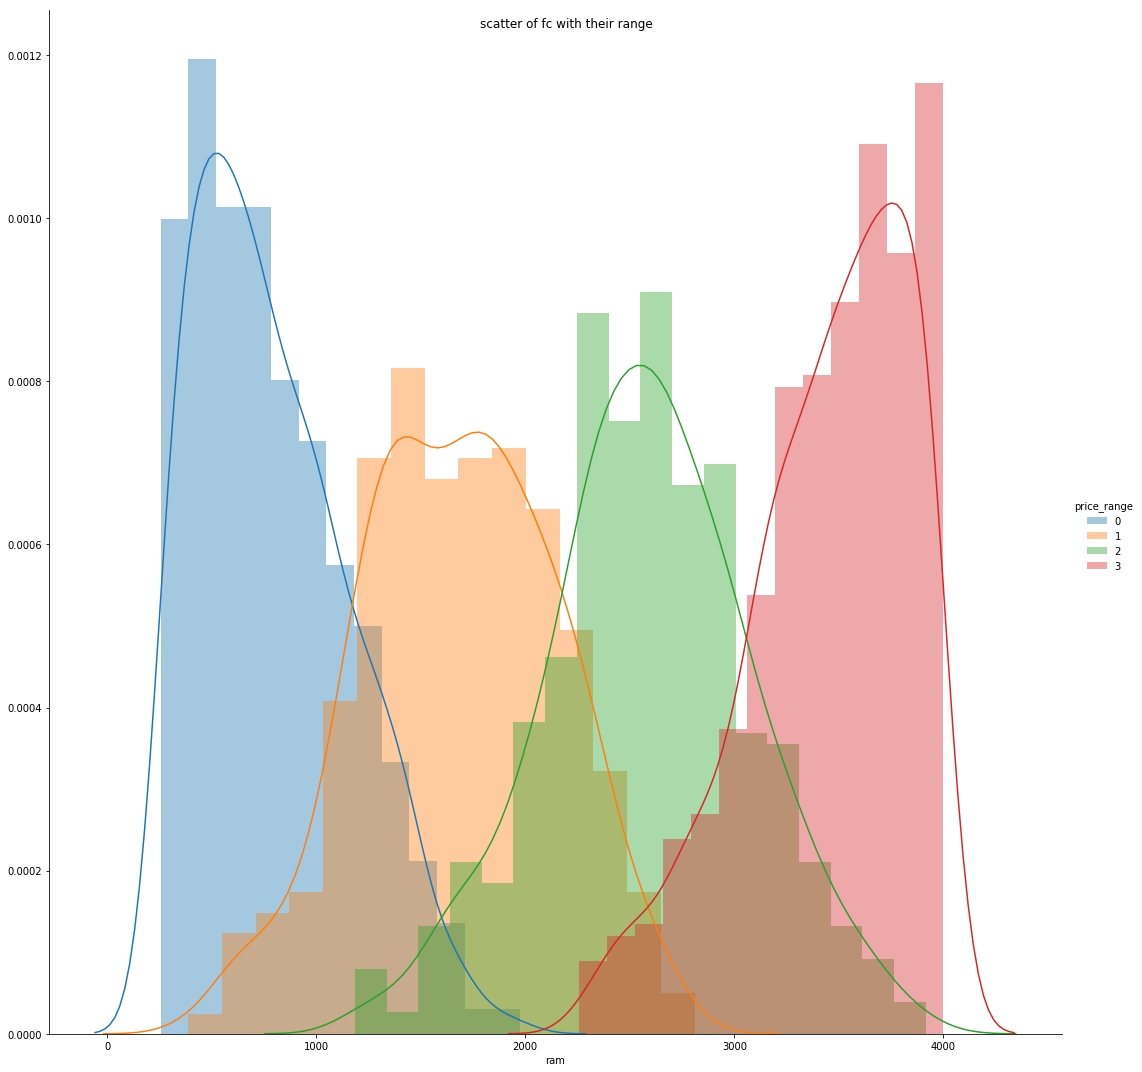

In [384]:
g=sns.FacetGrid(Data, hue="price_range", size=15) \
   .map(sns.distplot,'ram') \
   .add_legend();
g.fig.suptitle('scatter of fc with their range')
plt.show(); #Here we can see that the distribution of data for various price ranges.They overlapp a little but they tend to
#be different and we can easily classify them and by seeing we can easily tell that RAM is going to be very important feature in 
#Classifying the data into these 4 price ranges.

In [265]:
X=Data.iloc[:,:-1] #Getting allthe features into X dataframe

In [99]:
y=Data.iloc[:,-1] #Getting the target variable in the y variable

In [199]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0) #Splitting the data into train-test data.

In [420]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,penalty='l1',random_state=42)
lr.fit(X_train,y_train) #Using the logistic regression to fit the data and using C=300 as hyper-parameter for regularization
#Here C is equal to (1/lambda) in the regularization equation.We use the L1 penalty here so that we can get only important features
#and unimportant features will be 0.

C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [421]:
lr.score(X_test,y_test) #Here we can see that it gives 86% accuracy on our test data.

0.86

In [424]:
from sklearn.metrics import classification_report #This tells us that our model is very good in identifying the 0 and 3rd 
y_pred=lr.predict(X_test) #classes.But not that good in identifying the 1st and 2nd class.Both the recall and precision are bad 
print(classification_report(y_pred,y_test)) #in this case.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       211
           1       0.72      0.72      0.72       187
           2       0.72      0.75      0.73       191
           3       0.99      0.98      0.98       211

   micro avg       0.86      0.86      0.86       800
   macro avg       0.86      0.85      0.85       800
weighted avg       0.86      0.86      0.86       800



In [556]:
lr.coef_ #Here we can see what our Logstic regression has trained for us...->The Weights<-. of size(no_of_classes,No_of_dimentions)
#i.e 4*20.4 classes and 20 features.As we are having 4 classes we will have 4 different hyper-planes by the use of One-Vs-Rest
#Classifier.

array([[-2.12427318e-02, -3.86211290e-02,  1.19750360e-01,
        -1.22135075e-01, -1.67119976e-02,  5.19288020e-02,
        -1.33103428e-02, -2.14384158e-01,  2.96130887e-02,
        -5.09729852e-02,  5.30599367e-02, -1.27868102e-02,
        -1.31042114e-02, -3.53143177e-02,  1.03362680e-01,
        -7.83348907e-03,  7.25135235e-02,  4.16532193e-01,
         7.16008553e-01,  1.12009547e+00],
       [-6.63918004e-06,  3.02653521e-02,  1.78264962e-02,
         8.70365635e-02, -7.96383294e-03,  1.62355130e-01,
         5.19817664e-04,  5.50503608e-01,  6.85397720e-04,
        -8.13600635e-02,  1.28037700e-02, -1.19805123e-05,
         3.35557427e-05, -5.52750051e-04,  2.12490052e-02,
        -3.20320786e-02,  1.08671687e-02,  2.18032798e-01,
         8.66984055e-02,  1.47924925e-01],
       [-3.52826702e-05, -1.78390309e-02, -4.63568085e-02,
        -6.54321513e-02,  1.59869081e-02, -1.94182223e-01,
        -3.39906945e-03, -1.48676811e-01,  3.36964701e-03,
         4.71289037e-02, -1.0

In [559]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=3) #Now we try the Support-vector-classifier which uses support-vectors to classify the Data.
#Here we have used polynomial kernel of degree 3 to create a polynomial boundry to classify the data.

In [560]:
svc.fit(X_train,y_train) #Fitting the training data into the classifier.

C:\Users\Roggh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [561]:
svc.score(X_test,y_test) #Here the score is 96.75% which is much better than logistic regression.

0.9675

In [562]:
y_pred=svc.predict(X_test) #This classifier unlike LR is better at identifying all the classes.and has high F1 score for all the
print(classification_report(y_pred,y_test)) #Classes rather than only 1st and 4th.

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       213
           1       0.92      0.97      0.95       177
           2       0.97      0.95      0.96       203
           3       0.98      0.99      0.99       207

   micro avg       0.97      0.97      0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [598]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(random_state=0),n_estimators=1000,learning_rate=0.1,random_state=0)

In [599]:
AdaBoost.fit(X_train,y_train) #fitting the training data into the Adaboost classifier.

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          learning_rate=0.1, n_estimators=1000, random_state=0)

In [600]:
AdaBoost.score(X_test,y_test) #getting the score from the adaboost classifier.

0.9

In [601]:
AdaBoost.feature_importances_ #Here we have the feature importance in the case of AdaBoostClassifier.

array([1.11063762e-01, 8.03906435e-04, 1.48829713e-03, 1.33809586e-04,
       1.77542409e-03, 8.86631695e-04, 3.95814712e-03, 1.23957361e-03,
       4.06156044e-03, 1.91110750e-03, 9.67723954e-04, 4.75860689e-02,
       3.28611467e-02, 7.86316354e-01, 8.13627585e-04, 9.36567968e-04,
       2.69703618e-03, 1.71480845e-04, 1.23837976e-04, 2.03936214e-04])

In [602]:
y_pred=AdaBoost.predict(X_test)
print(classification_report(y_pred,y_test)) #This clasifier is better than the logistic regression but not as good as Support-vector
#Classifier.

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       208
           1       0.87      0.85      0.86       191
           2       0.83      0.86      0.84       192
           3       0.93      0.93      0.93       209

   micro avg       0.90      0.90      0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

